In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Load Haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [3]:
#data-points and features
print (haberman.shape)

(305, 4)


In [4]:
#column names in the dataset
print (haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


Coloumn names is not provided in the dataset.

In [5]:
#Adding column names to the dataset
haberman.columns = ["Age", "Operation_Year", "Axil_Nodes", "Survival_Status"]
haberman.columns

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')

Names of the columns added by referring to the dataset.

In [6]:
haberman.head() #print top 5 rows from the haberman dataset

,Age,Operation_Year,Axil_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


#### Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)<br>
3. Number of positive axillary nodes detected (numerical)<br>
4. Survival status (class attribute)<br>
    1. 1 = the patient survived 5 years or longer
    2. 2 = the patient died within 5 year
5. Missing Attribute Values: None

In [7]:
haberman.describe()

,Age,Operation_Year,Axil_Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations
##### Age
- Total count of patients is 305.
- Mean age of patients is 52.531148 years.
- Minimum age of the patient is 30 and maximum age is 83.

##### Operation Year
- Mean age for operation is 62.849180 years.
- Minimum age for opeartion is 58 years.
- Maximum age for operation is 69 years.
- 75% of the operations occrred at age of 61 years.

##### Axil Nodes
- At an average patients had 4.036066 positive axilliary nodes.
- 75% of the patients had 4 axilliary nodes.
- A patient had maximum of 52 axilliary nodes.

##### Survival Status 
- 75% of the patients died within 5 years of treatment.


In [8]:
print(haberman["Survival_Status"].value_counts())

1    224
2     81
Name: Survival_Status, dtype: int64


- 224 patients died within 5 years of treatment.
- 81 patients died after 5 years of treatment.

# 2-D Scatter Plot

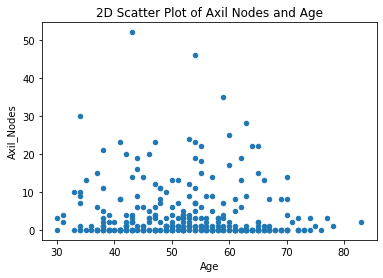

In [9]:
#2-D scatter plot without color labels:
haberman.plot(kind='scatter', x='Age', y='Axil_Nodes').set(title='2D Scatter Plot of Axil Nodes and Age')
plt.show()


## Observation
- There is no color coding. Therefore nothing much can be inferred from the graph.

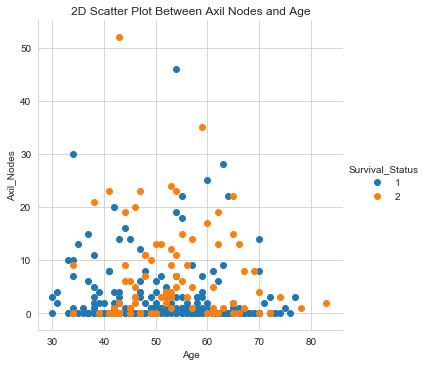

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="Survival_Status", height=5)\
   .map(plt.scatter, "Age", "Axil_Nodes")\
   .add_legend().set(title='2D Scatter Plot Between Axil Nodes and Age')
plt.show()
plt.close()

## Observations
- Majority of the patients don't have axil nodes.
- There is a lot of overlap between the orange and the blue points. Therefore nothing much can be inferred from 2D scatter plots. So we try Pair Plots.

## Pair Plot

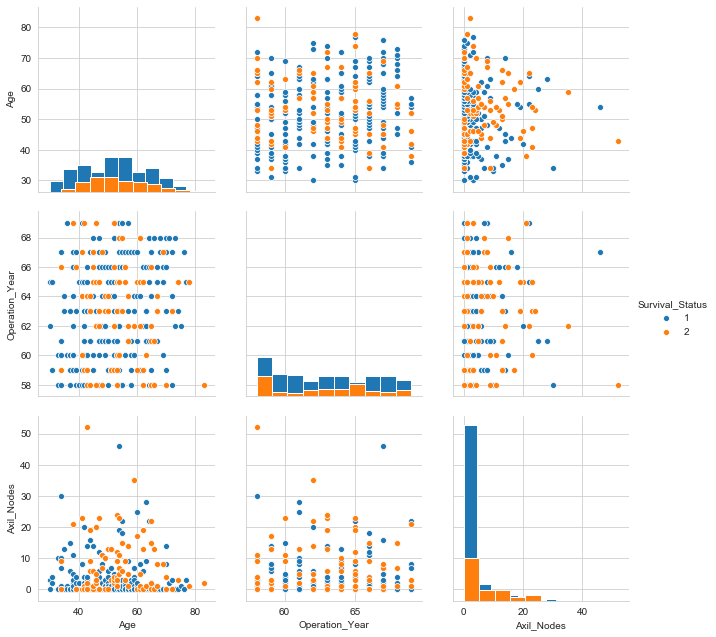

In [11]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="Survival_Status", diag_kind ="hist",vars = ['Age', 'Operation_Year', 'Axil_Nodes'], height = 3)
plt.show()

## Observation:
- Most of the pair plots have lots of overlap.Therefore very less information can be drawn out from the graphs.
- Most of the patients who survived had zero axil nodes can be inferred from Axil_Nodes vs Axil_Nodes histogram.

#  Histogram

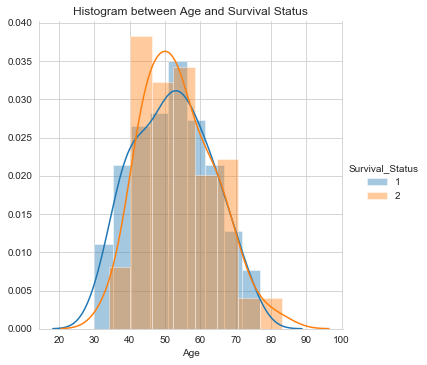

In [12]:
sns.FacetGrid(haberman, hue="Survival_Status", height = 5) \
.map(sns.distplot,"Age") \
.add_legend()\
.set(title='Histogram between Age and Survival Status')
plt.show()

## Observations
- There is lot of overlap in the Survival Status. So we can say that Survival Status of a patient is not dependent on the age of the patient.
- Patient in the age group of 20 to 40 are more likely to survive because there is less overlap in the 20 to 40 region.

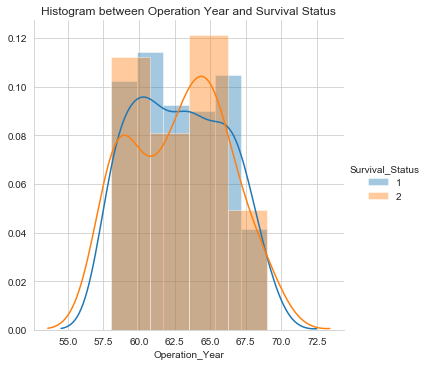

In [13]:
sns.FacetGrid(haberman, hue="Survival_Status", height = 5) \
.map(sns.distplot,"Operation_Year") \
.set(title='Histogram between Operation Year and Survival Status')\
.add_legend();
plt.show()

## Observations
- There is lot of overlapping in the graph. So nothing much can be established between Survival_Status and Operation_Year.
- However it tells that there were lots of unsuccessful operations in the year 1960 to 1966.

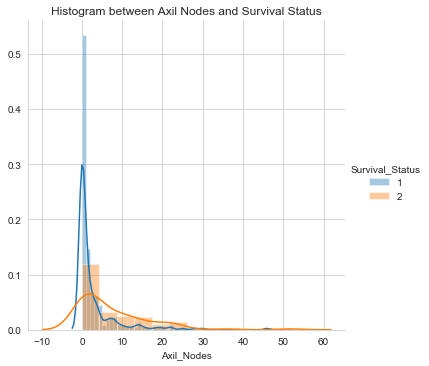

In [14]:
sns.FacetGrid(haberman, hue="Survival_Status", height = 5) \
.map(sns.distplot,"Axil_Nodes") \
.set(title='Histogram between Axil Nodes and Survival Status')\
.add_legend();
plt.show()

## Observations
- Patients with 0 node or 1 node are more likely to survive. 
- Patients with more than 25 nodes are less likely to survive.

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


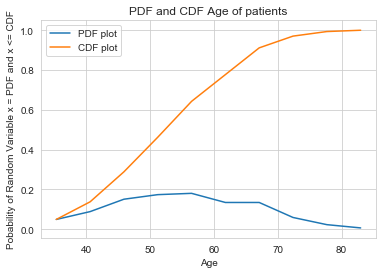

In [15]:
# PDF and CDF of age of the patients.
counts, bin_edges = np.histogram(haberman['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF Age of patients')
plt.xlabel('Age')
plt.ylabel('Pobability of Random Variable x = PDF and x <= CDF')

labels = ["PDF plot", "CDF plot"]
plt.legend(labels)
plt.show()

## Observation
- 4.918% of the patients have age 30 years.

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


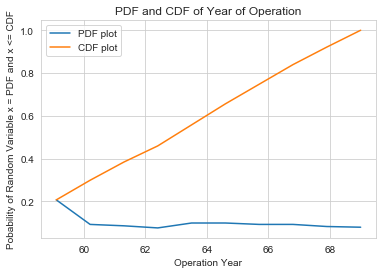

In [16]:
# PDF and CDF of age of the patients.
counts, bin_edges = np.histogram(haberman['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of Year of Operation')
plt.xlabel('Operation Year')
plt.ylabel('Pobability of Random Variable x = PDF and x <= CDF')

labels = ["PDF plot", "CDF plot"]
plt.legend(labels)
plt.show()

## Observation:
- 20% patients had operation in the year 1958.

In [17]:
long = haberman.loc[haberman["Survival_Status"]==1]
short = haberman.loc[haberman["Survival_Status"]==2]

Patients are divided into survival status of 1 (more than 5 years) and 2 (less than 5 years)

In [18]:
long.describe()

,Age,Operation_Year,Axil_Nodes,Survival_Status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [19]:
short.describe()

,Age,Operation_Year,Axil_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


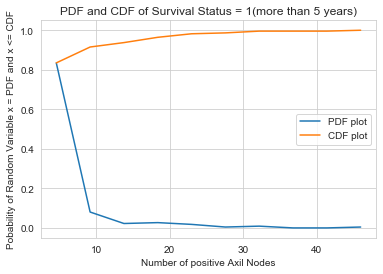

In [20]:
# PDF CDF of patients who survived more than 5 years.
counts, bin_edges = np.histogram(long['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of Survival Status = 1(more than 5 years)')
plt.xlabel('Number of positive Axil Nodes')
plt.ylabel('Pobability of Random Variable x = PDF and x <= CDF')

labels = ["PDF plot", "CDF plot"]
plt.legend(labels)
plt.show()

## Observation
- 83% of the patients survived more than 5 years who had zero nodes.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


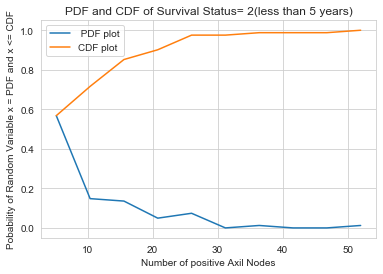

In [21]:
# PDF CDF of patients who survived less than 5 years.
counts, bin_edges = np.histogram(short['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF of Survival Status= 2(less than 5 years)')
plt.xlabel('Number of positive Axil Nodes')
plt.ylabel('Pobability of Random Variable x = PDF and x <= CDF')

labels = [" PDF plot", "CDF plot"]
plt.legend(labels)
plt.show()


## Observation
- 56% patients who survived less than 5 years had zero nodes.

# Box Plot

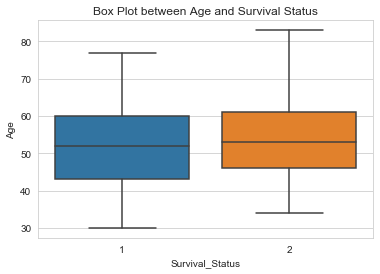

In [22]:
# Box-Plot with Survial_Status on x-axis and Age on y-axis
sns.boxplot(x="Survival_Status", y="Age", data = haberman).set(title='Box Plot between Age and Survival Status')
plt.show()

## Observation
- Whiskers of Box Plot shows that the data does not contain outliers.
- Blue box plot is symmetrical because upper whisker length is equal to lower whisker length.
- Orange box plot is positively skewed because upper whisker is bigger than lower whisker.

### Age
#### Survival Status = 1
- 75% of the patients with Survival_Status = 1(More than 5 years) have age less than 60 years.
- 50% of the patients with Survival_Status = 1(More than 5 years) have age less than 52 years.
- 25% of the patients with Survival_Status = 1(More than 5 years) have age less than 43 years.

#### Survival Status = 2
- 75% of the patients with Survival_Status = 2(Less than 5 years) have age less than 61 years.
- 50% of the patients with Survival_Status = 2(Less than 5 years) have age less than 53 years.
- 25% of the patients with Survival_Status = 2(Less than 5 years) have age less than 46 years.


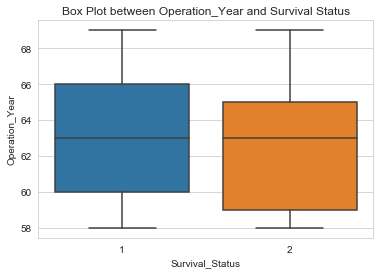

In [23]:
# Box-Plot with Survial_Status on x-axis and Operation_Year on y-axis
ax = sns.boxplot(x="Survival_Status", y="Operation_Year", data = haberman).set(title='Box Plot between Operation_Year and Survival Status')
plt.show()

## Observation
- Whiskers of Box Plot show that the data is skewed but it does not contain outliers.
- Blue box plot is slightly skewed because upper whisker length is bigger than lower whisker length.
- Orange box plot is positively skewed because upper whisker is bigger than lower whisker.


### Operation Year
#### Survival Status = 1
- 75% of the patients with Survival_Status = 1(More than 5 years) had operation before 1966.
- 50% of the patients with Survival_Status = 1(More than 5 years) had operation before 1963.
- 25% of the patients with Survival_Status = 1(More than 5 years) had operation before 1960.

#### Survival Status = 2
- 75% of the patients with Survival_Status = 2(Less than 5 years) had operation before 1965.
- 50% of the patients with Survival_Status = 2(Less than 5 years) had operation before 1963.
- 25% of the patients with Survival_Status = 2(Less than 5 years) had operation before 1959.


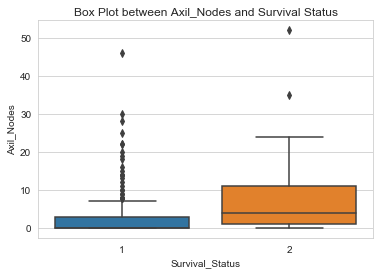

In [24]:
# Box-Plot with Survial_Status on x-axis and Axil_Nodes on y-axis
sns.boxplot(x="Survival_Status", y="Axil_Nodes", data = haberman).set(title='Box Plot between Axil_Nodes and Survival Status')
plt.show()

## Observation
- Whiskers of Box Plot show that the data contains outliers.
- Blue box plot is positively because upper whisker length is greater than lower whisker length.
- Orange box plot is positively skewed because upper whisker is bigger than lower whisker.


### Axil Nodes
#### Survival Status = 1 
- 75% of the patients with Survival_Status = 1(More than 5 years) have axil nodes = 3.
- 50% of the patients with Survival_Status = 1(More than 5 years) have axil nodes = 0.
- 25% of the patients with Survival_Status = 1(More than 5 years) have axil nodes = 0.

#### Survival Status = 2
- 75% of the patients with Survival_Status = 2(Less than 5 years) have axil nodes = 11.
- 50% of the patients with Survival_Status = 2(Less than 5 years) have axil nodes = 4.
- 25% of the patients with Survival_Status = 2(Less than 5 years) have axil nodes = 1.


## Violin Plots

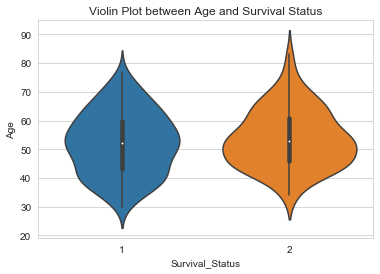

In [25]:
ax=sns.violinplot(x="Survival_Status", y="Age", data=haberman, size=8).set(title='Violin Plot between Age and Survival Status')
plt.show()

## Observations
- Box plots and Violin plots are giving similar results because by definition Violin plot contains box plots.
- Tail of the Violin PLot for Survival_Status = 1 is short (less skewed). It means that it contains less number of outliers.
- Tail of the Violin PLot for Survival_Status = 2 is long (more skewed). It means that it contains more number of outliers.

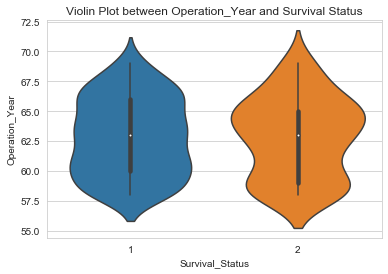

In [26]:
sns.violinplot(x="Survival_Status", y="Operation_Year", data=haberman, size=8).set(title='Violin Plot between Operation_Year and Survival Status')
plt.show()

## Observations
- Box plots and Violin plots are giving similar results because by definition Violin plot contains box plots.
- Tail of the Violin PLot for Survival_Status = 1 is short (less skewed). It means that it contains less number of outliers.
- Tail of the Violin PLot for Survival_Status = 2 is short (less skewed). It means that it contains less number of outliers.

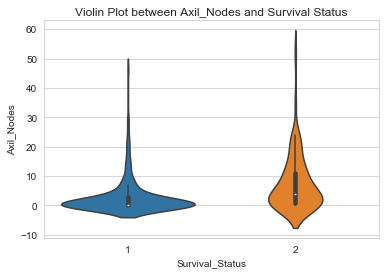

In [27]:
sns.violinplot(x="Survival_Status", y="Axil_Nodes", data=haberman, size=8).set(title='Violin Plot between Axil_Nodes and Survival Status')
plt.show()

## Observations
- Box plots and Violin plots are giving similar results because by definition Violin plot contains box plots.
- Tail of the Violin PLot for Survival_Status = 1 is long (more skewed). It means that it contains more number of outliers.
- Tail of the Violin PLot for Survival_Status = 2 is long (more skewed). It means that it contains more number of outliers.

## Contour Plot

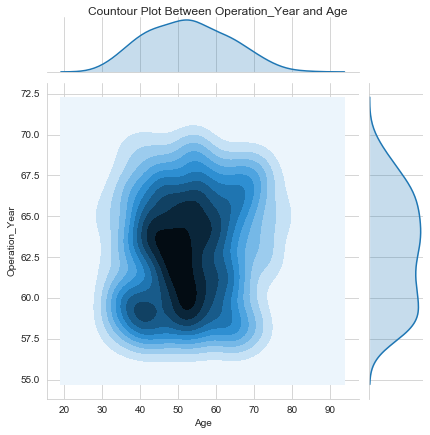

In [28]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="Operation_Year", data=haberman, kind="kde")
plt.suptitle("Countour Plot Between Operation_Year and Age", va="baseline")
plt.show();


## Observation
- Most of the patients have undergone operation in the age of 40 to 60 years between the years 1957 to 1967.

# Conclusions
### From 2-D Scatter Plot
- Majority of the patients don't have axil nodes.   
- There is a lot of overlap between the orange and the blue points. Therefore nothing much can be inferred from 2D scatter plots. So we try Pair Plots.

### From Pair Plots
- Most of the pair plots have lots of overlap.Therefore very less information can be drawn out from the graphs.
- Most of the patients who survived had zero axil nodes can be inferred from Axil_Nodes vs Axil_Nodes histogram.

### From Histogram
- Patient in the age group of 20 to 40 are more likely to survive.
- there were lots of unsuccessful operations in the year 1960 to 1966.
- Patients with 0 node or 1 node are more likely to survive.
- Patients with more than 25 nodes are less likely to survive.

###  From PDF and CDF
- 4.918% of the patients have age 30 years.
- 20% patients had operation in the year 1958.
- 83% of the patients survived more than 5 years had zero nodes.
- 56% patients who survived less than 5 years had zero nodes.

### From Box Plot 
- Whiskers of Box Plot show that the data contains outliers.

### From Violin Plot
- Box plots and Violin plots are giving similar results because by definition Violin plot contains box plots.
- The long tail(skewness) of Violin plot shows that the data points contain outliers.

### From Contour Plot
- Most of the patients have undergone operation in the age of 40 to 60 years between the years 1957 to 1967

## Final Conclusion- 
- Patient's age, year of operation, number of axil nodes are not giving a clear picture of the patient's survival status.
- Number of Axil nodes is inversely proprtional to the survival status of the patient.
- Classifying the patients based on the survival status is a difficult task because most of the data is overlapping.